In [247]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Spotify

In [248]:
# Read the spotify dataset
spotify_df = pd.read_csv('dataset.csv')
spotify_df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [249]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Preprocessing

In [250]:
spotify_df.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [251]:
# Drop the first columns
spotify_df.drop(columns=spotify_df.columns[0], axis=1, inplace=True)

In [252]:
# Remove unused columns
unused_col = ['track_id', 'artists', 'album_name', 'track_name', 'mode', 'time_signature', 'instrumentalness', 'duration_ms']
spotify_df = spotify_df.drop(columns=unused_col)

In [253]:
# Remove more columns
spotify_df = spotify_df[['popularity', 'explicit', 'track_genre']]

In [254]:
spotify_df.head(10)

,popularity,explicit,track_genre
0,73,False,acoustic
1,55,False,acoustic
2,57,False,acoustic
3,71,False,acoustic
4,82,False,acoustic
5,58,False,acoustic
6,74,False,acoustic
7,80,False,acoustic
8,74,False,acoustic
9,56,False,acoustic


In [255]:
# Check if dataset contain any null value
spotify_df.isnull().values.any()

False

In [256]:
# Inspect dataset structure
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   popularity   114000 non-null  int64 
 1   explicit     114000 non-null  bool  
 2   track_genre  114000 non-null  object
dtypes: bool(1), int64(1), object(1)
memory usage: 1.8+ MB


In [257]:
# Check columns number of unique values
spotify_df.nunique()

popularity     101
explicit         2
track_genre    114
dtype: int64

In [258]:
# Get all track_genre columns unique values
spotify_df['track_genre'].unique().tolist()

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

In [259]:
# Get only certain track genres 
filter_genre = ['acoustic', 'indie', 'spanish', 'sad', 'hip-hop']
spotify_df = spotify_df[spotify_df['track_genre'].isin(filter_genre)]

In [260]:
spotify_df['track_genre'].unique().tolist()

['acoustic', 'hip-hop', 'indie', 'sad', 'spanish']

In [261]:
spotify_df.reset_index(drop=True, inplace=True)

In [262]:
# Change the explicit columns to intergers
# It only has two unique values: TRUE, FALSE
explicit_dict = {'FALSE': 0, 'TRUE': 1}
spotify_df['explicit'] = spotify_df['explicit'].replace(explicit_dict).astype(int)

In [263]:
spotify_df.head(10)

,popularity,explicit,track_genre
0,73,0,acoustic
1,55,0,acoustic
2,57,0,acoustic
3,71,0,acoustic
4,82,0,acoustic
5,58,0,acoustic
6,74,0,acoustic
7,80,0,acoustic
8,74,0,acoustic
9,56,0,acoustic


In [264]:
# Check explicit unique values still remain at 2
spotify_df['explicit'].nunique()

2

In [265]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   popularity   5000 non-null   int64 
 1   explicit     5000 non-null   int32 
 2   track_genre  5000 non-null   object
dtypes: int32(1), int64(1), object(1)
memory usage: 97.8+ KB


## Classfication

In [266]:
# Get the data and labels 
data = spotify_df.drop(columns='track_genre')
labels = spotify_df['track_genre']

In [267]:
labels.unique()

array(['acoustic', 'hip-hop', 'indie', 'sad', 'spanish'], dtype=object)

In [268]:
data.nunique()

popularity    90
explicit       2
dtype: int64

In [269]:
print(labels.shape, data.shape)

(5000,) (5000, 2)


In [270]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [271]:
def score(model_predict) -> None:
    acc = round(accuracy_score(y_test, model_predict), 2)
    prs = round(precision_score(y_test, model_predict, average='macro'), 2)
    rll = round(recall_score(y_test, model_predict, average='macro'), 2)
    f1 = round(f1_score(y_test, model_predict, average='macro'), 2)
    print(f'Accuracy Score: {acc}\nPrecision Score: {prs} \nRecall Score: {rll} \nF1 Score: {f1}')

### Classification with KNN

In [272]:
# Model
model_knn = KNeighborsClassifier(n_neighbors=3)

In [273]:
# Fit
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [274]:
knn_predict = model_knn.predict(x_test)

In [275]:
score(knn_predict)

Accuracy Score: 0.47
Precision Score: 0.49 
Recall Score: 0.47 
F1 Score: 0.48


In [276]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

    acoustic       0.37      0.46      0.41       216
     hip-hop       0.55      0.49      0.52       190
       indie       0.44      0.53      0.48       192
         sad       0.67      0.45      0.54       210
     spanish       0.45      0.44      0.45       192

    accuracy                           0.47      1000
   macro avg       0.49      0.47      0.48      1000
weighted avg       0.49      0.47      0.48      1000



### DecisionTree Classfication

In [277]:
# Model
model_dt = DecisionTreeClassifier(random_state=0)

In [278]:
# Fit
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [279]:
# Predict
dt_predict = model_dt.predict(x_test)

In [280]:
score(dt_predict)

Accuracy Score: 0.5
Precision Score: 0.54 
Recall Score: 0.51 
F1 Score: 0.5


### LinearSVC

In [281]:
model_svc = LinearSVC(random_state=0, dual='auto')

In [282]:
# fit
model_svc.fit(x_train, y_train)

LinearSVC(dual='auto', random_state=0, tol=1e-05)

In [283]:
# Predict
svc_predict = model_svc.predict(x_test)

In [284]:
score(svc_predict)

Accuracy Score: 0.35
Precision Score: 0.38 
Recall Score: 0.35 
F1 Score: 0.31


c:\Users\Jeffr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

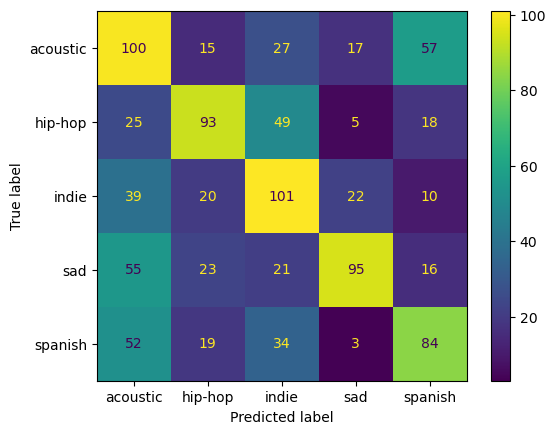

In [285]:
# KNN Confusion Matrix
cm = confusion_matrix(y_test, knn_predict, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()

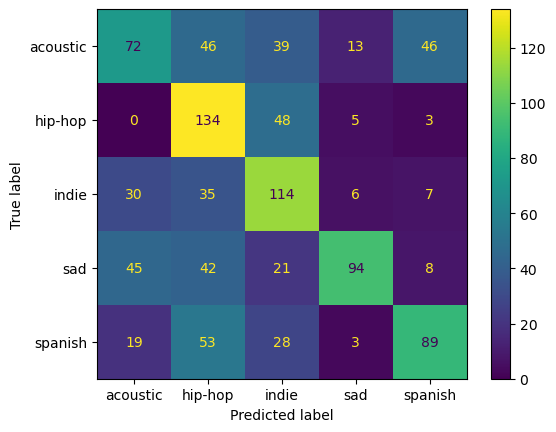

In [286]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, dt_predict, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()
plt.show()

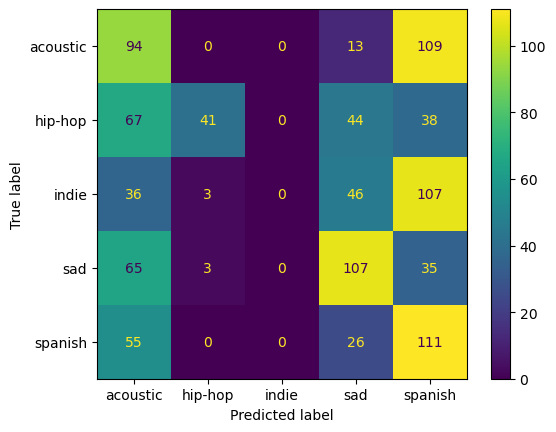

In [287]:
# SVC Confusion Matrix
cm = confusion_matrix(y_test, svc_predict, labels=model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svc.classes_)
disp.plot()
plt.show()